# Bay Area, CA - Airbnb Data


### Context

Since its inception in 2008, Airbnb has disrupted the hospitality industry by allowing almost anyone to rent out a spare room and host travelers looking for an overnight stay.

While Airbnb has publicly available data from many locations, **Santa Clara County is of particular interest as it is one of the major counties in the Bay Area and home to many prominent tech companies and startups in the Silicon Valley.**
As such, home prices and cost of living are exceptionally high in this area, as one will see in the data.

### Content

All data is publicly available under the Creative Commons "Public Domain Dedication" license and has been updated as of June 12th, 2020.Provided are metrics that are publicly visible for each listing (e.g. name, description, price, reviews, etc.), but the dataset contains some Airbnb's internal metrics as well (review score accuracy, host acceptance rate, etc.).

### Acknowledgements

Acknowledgments go to Airbnb for their publicly released datasets that are available at this website.

### Inspiration & ideas:

1. Create a price-suggestion model for new Airbnb hosts who might not know the value of their listing.
   - Text mining with statified house price data
2. Can we predict the rating of an Airbnb listing utilizing **NLP** of the description columns?How have Airbnb
3. prices changed over time? Are prices seasonal?
   - Time series analysis?
4. Which areas in the Santa Clara County are most "popular"?
   - Region analysis
5. Which features of an Airbnb listing are important to add to its perceived value?
   - Feature analysis,PCA
   - Correlation analysis

#### Notes:

1.  Selecting the data you need : feature_df, instead of take them all even if you drop some of the missing value columns.
2.  Making binary data in on column, instead of one-hot encoding.
3.  PCA


## Import libraries and data


In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

In [197]:
data = pd.read_csv('./data/Airbnb_Listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,NaN,NaN,https://a0.muscache.com/im/pictures/529448/3d7...,NaN,7054,https://www.airbnb.com/users/show/7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/7054/profile_...,https://a0.muscache.com/im/users/7054/profile_...,Palo Alto,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,NaN,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",NaN,$90.00,$440.00,"$1,428.00",$0.00,$35.00,1,$45.00,2,365,2,2,365,365,2.0,365.0,2 months ago,t,0,0,0,0,2020-05-30,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,NaN,NaN,https://a0.muscache.com/im/pictures/121321/2c5...,NaN,42458,https://www.airbnb.com/users/show/42458,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,90%,f,https://a0.muscach

In [198]:
data.shape

(7221, 106)

## Data Cleaning


### Visualize missing and null values


In [199]:
def percent_missing(df,rows):
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)

    missing_value_df = pd.DataFrame(
        {'column_name': df.columns,
        'percent_missing': percent_missing}).sort_values(by='percent_missing', ascending=False)
    missing_value_df.reset_index(drop=True, inplace=True)

    return missing_value_df.head(rows)


In [200]:
percent_missing(data,40)

,column_name,percent_missing
0,neighbourhood_group_cleansed,100.00
1,thumbnail_url,100.00
2,license,100.00
3,xl_picture_url,100.00
4,medium_url,100.00
5,square_feet,99.60
6,weekly_price,92.05
7,monthly_price,91.80
8,notes,48.87
9,access,43.17


In [201]:
drop_cols = percent_missing(data, 8).iloc[:,0]

In [202]:
data.drop(drop_cols, axis=1, inplace=True)

In [203]:
percent_missing(data,10)

,column_name,percent_missing
0,notes,48.87
1,access,43.17
2,transit,42.72
3,interaction,41.10
4,neighborhood_overview,37.07
5,host_about,32.32
6,house_rules,31.35
7,host_response_rate,25.02
8,host_response_time,25.02
9,space,23.64


### Drop columns


In [204]:
# find missing values and single value columns in data:
del_cols = []

for col in data.columns:
    if data[col].isna().all() | data[col].nunique() == 1:
        del_cols.append(col)

In [205]:
del_cols

['scrape_id',
 'experiences_offered',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'is_business_travel_ready']

In [206]:
data = data.drop(del_cols, axis=1)

In [207]:
# delete url column:
urls = [
    'listing_url', 'picture_url', 'host_url', 'host_thumbnail_url',
    'host_picture_url'
]


In [208]:
# drop urls
data = data.drop(urls, axis=1)

In [209]:
def data_uiniqueness(df):
    uniq_list = []
    for col in data.columns:
        list_unique = (col, len(data[col].unique()))
        uniq_list.append(list_unique)

    unique_df = pd.DataFrame(uniq_list).sort_values(ascending=False,by=1)
    unique_df.columns = ['column_name', 'unique_values']
    return unique_df

In [210]:
data_uiniqueness(data)

,column_name,unique_values
0,id,7221
2,name,7078
5,description,6440
45,amenities,6396
36,longitude,6357
3,summary,6052
35,latitude,5882
4,space,4403
11,house_rules,3718
12,host_id,3533


In [211]:
#Visualize proprty_type:

_, ax = plt.subplots(figsize=(8, 6))

ax.hist(data['property_type'], bins=100)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

KeyboardInterrupt: 

In [ ]:
data['state'].unique()  # Bay area, same state, to drop

array(['CA', 'Ca', 'ca', nan, 'California '], dtype=object)

In [ ]:
data = data.drop(['zipcode', 'state'], axis=1)


<AxesSubplot:>

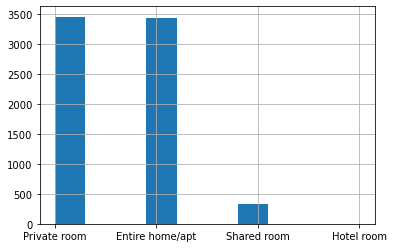

In [ ]:
data['room_type'].hist(bins=10)

In [ ]:
data['room_type'].value_counts()

Private room       3454
Entire home/apt    3431
Shared room         334
Hotel room            2
Name: room_type, dtype: int64

In [ ]:
data.drop(data[data['room_type'] == 'Hotel room'].index, inplace=True)


### Clean the city column


In [ ]:
data['city'].unique()

array(['Palo Alto', 'Santa Clara', 'Mountain View', 'San Jose',
       'Cupertino', 'Sunnyvale', 'Campbell', 'Milpitas', 'Saratoga',
       'Morgan Hill', 'Los Altos', 'Los Gatos', 'Menlo Park',
       'Los Altos Hills', 'Monte Sereno', 'Hollister', 'Gilroy',
       'San Jose ', 'San Martin', 'Stanford', 'Santa Clara County',
       'Sunnyvale ', 'Palo Alto ', 'Milpitas ', 'Los Gatos ', 'san jose',
       'Mountain View ', 'Danville ', nan, 'Campbell ', '洛斯阿尔托斯',
       'santa clara', 'Fremont', '圣何塞', 'Watsonville'], dtype=object)

In [ ]:
data['city'] = data['city'].str.title()
data['city'] = data['city'].str.replace('圣何塞', 'San Jose')
data['city'] = data['city'].str.replace('洛斯阿尔托斯', 'Los Altos')
data['city'] = data['city'].str.replace('Santa Clara County', 'Santa Clara')
data['city'].str.strip()

0           Palo Alto
1         Santa Clara
2       Mountain View
3           Palo Alto
4            San Jose
            ...      
7216         San Jose
7217      Santa Clara
7218        Sunnyvale
7219         San Jose
7220         San Jose
Name: city, Length: 7219, dtype: object

In [ ]:
data['city'].unique()

array(['Palo Alto', 'Santa Clara', 'Mountain View', 'San Jose',
       'Cupertino', 'Sunnyvale', 'Campbell', 'Milpitas', 'Saratoga',
       'Morgan Hill', 'Los Altos', 'Los Gatos', 'Menlo Park',
       'Los Altos Hills', 'Monte Sereno', 'Hollister', 'Gilroy',
       'San Jose ', 'San Martin', 'Stanford', 'Sunnyvale ', 'Palo Alto ',
       'Milpitas ', 'Los Gatos ', 'Mountain View ', 'Danville ', nan,
       'Campbell ', 'Fremont', 'Watsonville'], dtype=object)

In [ ]:
data['city'].value_counts(ascending=False)

San Jose           3031
Palo Alto           787
Sunnyvale           764
Santa Clara         714
Mountain View       665
Cupertino           335
Milpitas            296
Los Gatos           133
Campbell            128
Los Altos            90
Saratoga             70
Morgan Hill          63
Los Altos Hills      53
Gilroy               32
Monte Sereno         16
San Martin           15
Menlo Park            4
Palo Alto             4
San Jose              3
Stanford              3
Fremont               3
Hollister             2
Sunnyvale             1
Milpitas              1
Los Gatos             1
Mountain View         1
Danville              1
Campbell              1
Watsonville           1
Name: city, dtype: int64

### Find the unique values in each column


<AxesSubplot:>

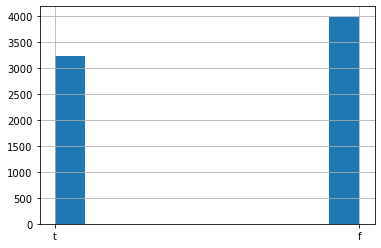

In [ ]:
data['host_is_superhost'].hist(bins=10)

In [ ]:
(data['require_guest_profile_picture'] ==
data['require_guest_phone_verification']).sum()/data.shape[0]


0.9810223022579304

Drop the 'require_guest_profile_picture' later


### Clean the duplicated columns,drop the following columns

based on the analysis abvoe, we can drop the following columns:


In [ ]:
data.drop([
    'host_id', 'last_scraped', 'market', 'require_guest_profile_picture',
    'minimum_maximum_nights', 'host_total_listings_count',
    'calendar_last_scraped'
],
          axis=1,
          inplace=True)

### Explore categorical features


In [ ]:
from math import sqrt, floor, ceil

def subplot_shape(nums):
    base = sqrt(len(nums))
    return int(floor(base)), int(ceil(base))

In [ ]:
def categories_less_10_plot(df):
    
    plot_cols = []
    
    for col, n in zip(df.columns, df.nunique()):
        if n < 10:
            plot_cols.append(col)
    
    n_row, n_col = subplot_shape(plot_cols)

    _, axes = plt.subplots(n_row, n_col, figsize=(20, 14), constrained_layout=True)

    for col, ax in zip(plot_cols, axes.flatten()):
        df[col].hist(bins=10,ax=ax)
        ax.set_title(col)

    plt.show()

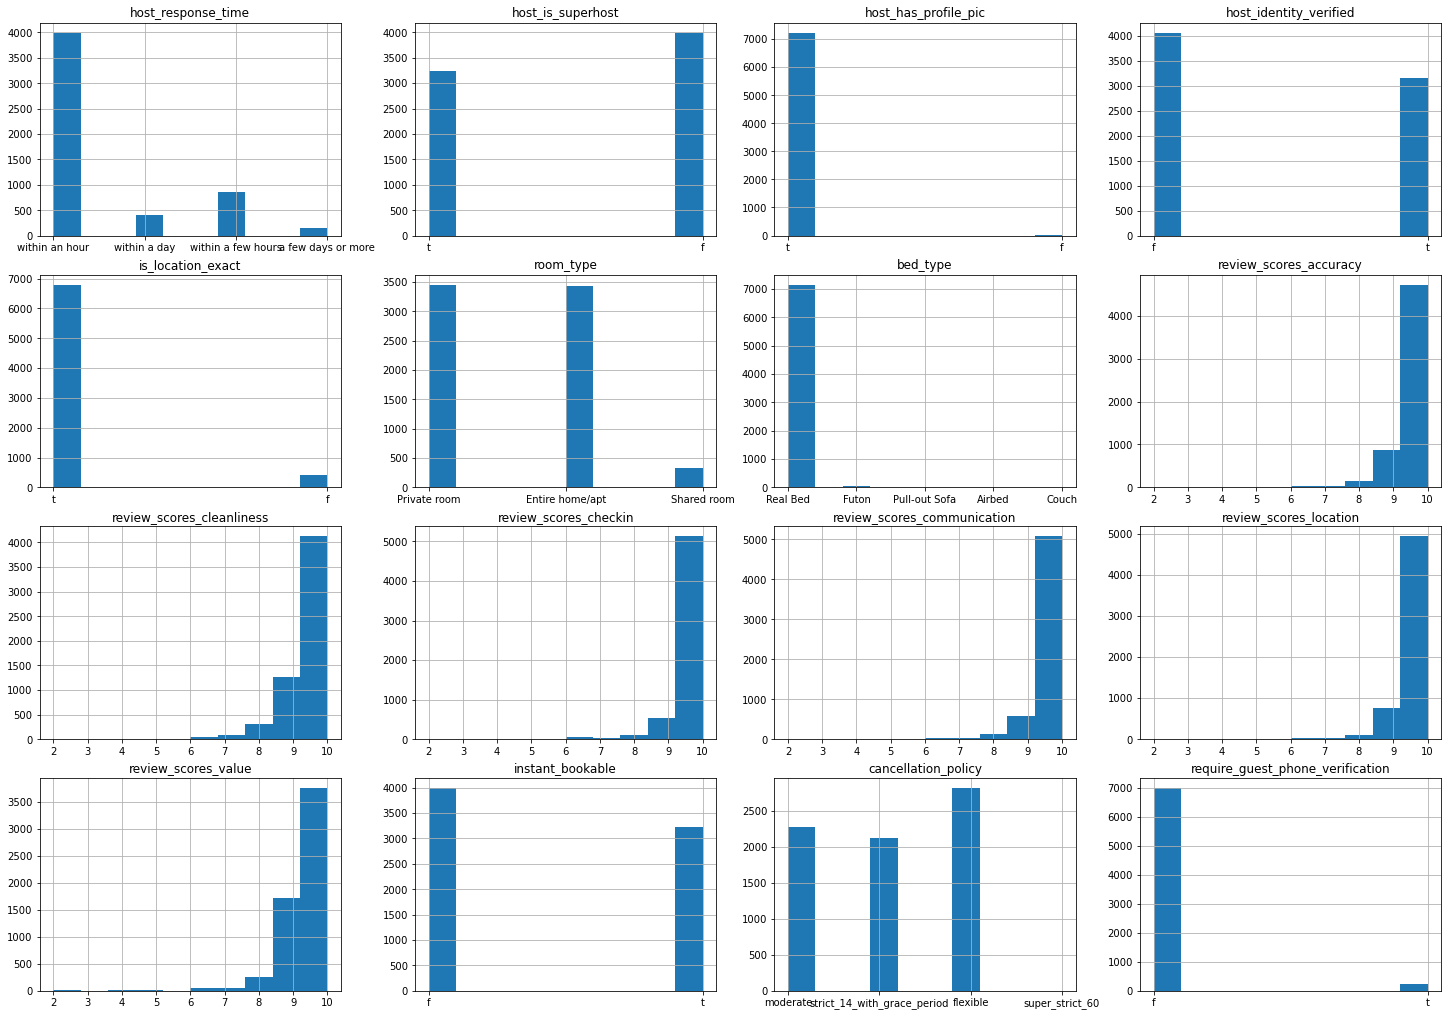

In [ ]:
categories_less_10_plot(df=data)

In [ ]:
data['is_location_exact'].value_counts()

t    6794
f     425
Name: is_location_exact, dtype: int64

In [ ]:
# drop the unbalanced categories:
data.drop(
    data[data['cancellation_policy'] == 'super_strict_60'].index,
    inplace=True)

In [ ]:
data.drop(['is_location_exact','require_guest_phone_verification'], axis=1, inplace=True)

In [ ]:
# bed_type
data['bed_type'].value_counts(ascending=False) # to drop

Real Bed         7153
Futon              30
Couch              14
Airbed             11
Pull-out Sofa      10
Name: bed_type, dtype: int64

### Transfer the unit of currency to float


In [ ]:
price_list = [
    'price',
    'security_deposit',
    'cleaning_fee',
    'extra_people',
]

In [ ]:
for p in price_list:
    print(p, data[p].isna().sum())


price 0
security_deposit 1457
cleaning_fee 800
extra_people 0


In [ ]:
for p in price_list:
    data[p].fillna('$0.00', inplace=True)
    data[p] = data[p].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_5045/1242419390.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[p] = data[p].str.replace('$', '').str.replace(',', '').astype(float)


In [ ]:
data[price_list].isna().sum()

price               0
security_deposit    0
cleaning_fee        0
extra_people        0
dtype: int64

In [ ]:
data[price_list].head(3)

,price,security_deposit,cleaning_fee,extra_people
0,90.0,0.0,35.0,45.0
1,85.0,700.0,250.0,10.0
2,65.0,1000.0,0.0,0.0


#### `data.groupby('host_response_time')['price'].value_counts(bins=6).to_frame()`


In [ ]:
data['price'].value_counts(bins=10).to_frame()

,price
"(0.009000000000000001, 1009.0]",7138
"(1009.0, 2008.0]",53
"(2008.0, 3007.0]",16
"(9001.0, 10000.0]",5
"(3007.0, 4006.0]",4
"(4006.0, 5005.0]",1
"(5005.0, 6004.0]",1
"(6004.0, 7003.0]",0
"(7003.0, 8002.0]",0
"(8002.0, 9001.0]",0


In [ ]:
data.drop(data[data['price'] >= 2008].index, inplace=True)

### Fill missingvalues


In [ ]:
data['reviews_per_month'].fillna(data['reviews_per_month'].mean(),
                                 inplace=True)
data['bedrooms'].fillna(data['bedrooms'].mean(), inplace=True)
data['bathrooms'].fillna(data['bathrooms'].mean(), inplace=True)

<AxesSubplot:>

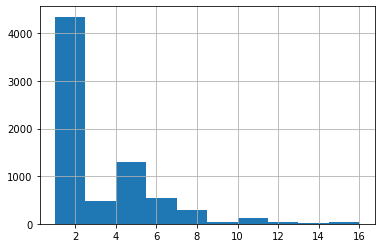

In [ ]:
data['accommodates'].hist(bins=10)

#### `value_counts(normalize=True).loc[lambda x: x > 0.2]` for categorical features analysis


In [ ]:
cat_features = data.select_dtypes(include=['object']).columns
cat_features

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'smart_location', 'property_type',
       'room_type', 'bed_type', 'amenities', 'calendar_updated',
       'first_review', 'last_review', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy'],
      dtype='object')

In [ ]:
cat_cols = []

for col in cat_features:
    list_unique = (col, len(data[col].unique()))
    print(col)
    print(data[col].value_counts(normalize=True).loc[lambda x: x > 0.2])
    cat_cols.append(list_unique)

name
Series([], Name: name, dtype: float64)
summary
Series([], Name: summary, dtype: float64)
space
Series([], Name: space, dtype: float64)
description
Series([], Name: description, dtype: float64)
neighborhood_overview
Series([], Name: neighborhood_overview, dtype: float64)
notes
Series([], Name: notes, dtype: float64)
transit
Series([], Name: transit, dtype: float64)
access
Series([], Name: access, dtype: float64)
interaction
Series([], Name: interaction, dtype: float64)
house_rules
Series([], Name: house_rules, dtype: float64)
host_name
Series([], Name: host_name, dtype: float64)
host_since
Series([], Name: host_since, dtype: float64)
host_location
San Jose, California, United States    0.269633
Name: host_location, dtype: float64
host_about
Series([], Name: host_about, dtype: float64)
host_response_time
within an hour    0.73772
Name: host_response_time, dtype: float64
host_response_rate
100%    0.812234
Name: host_response_rate, dtype: float64
host_acceptance_rate
100%    0.340629

In [ ]:
# just try
data['city'].value_counts(normalize=True).loc[lambda x: x > 0.1]

San Jose     0.420862
Palo Alto    0.108345
Sunnyvale    0.106120
Name: city, dtype: float64

In [ ]:
### Check the numerical and nominal data seperately

numeric_features = data.select_dtypes(include=['int64', 'float64'])
nominal_features = data.select_dtypes(include=['object'])

### Last drop


In [ ]:
data.drop(['host_has_profile_pic', 'bed_type', 'beds'], axis=1, inplace=True)


In [ ]:
data_uiniqueness(data).head(10)

,column_name,unique_values
0,id,7191
1,name,7049
4,description,6415
35,amenities,6370
29,longitude,6331
2,summary,6027
28,latitude,5860
3,space,4389
10,house_rules,3709
5,neighborhood_overview,3501


In [ ]:
data_uiniqueness(data).tail(10)

,column_name,unique_values
61,review_scores_communication,9
59,review_scores_cleanliness,9
58,review_scores_accuracy,9
62,review_scores_location,8
15,host_response_time,5
66,cancellation_policy,3
18,host_is_superhost,3
22,host_identity_verified,3
31,room_type,3
65,instant_bookable,2


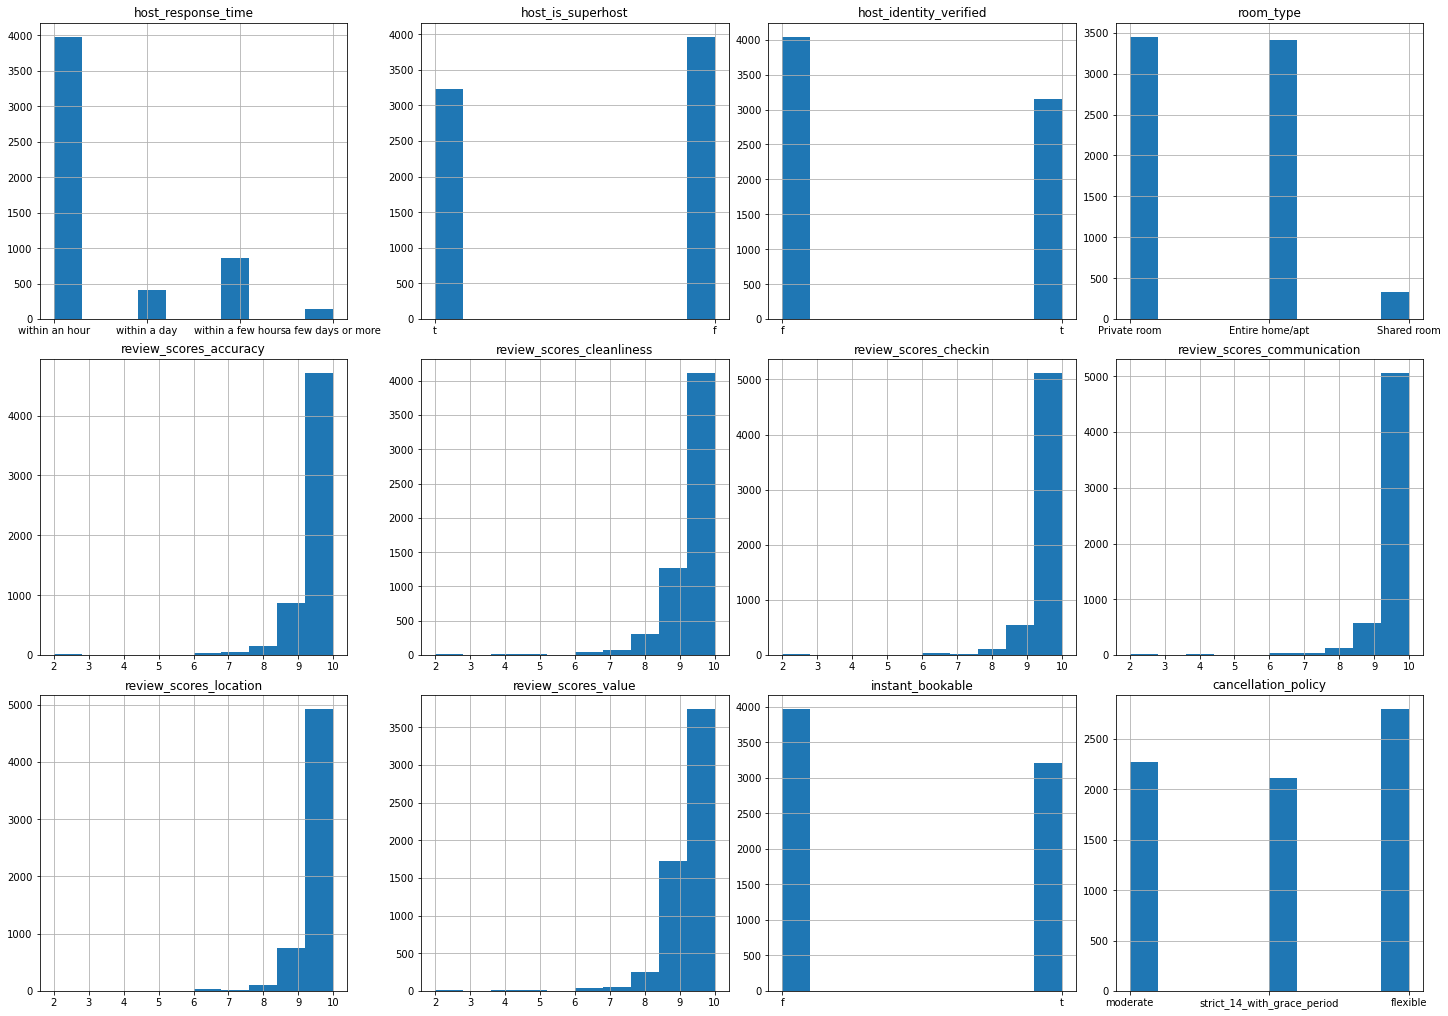

In [ ]:
# visualize the data
categories_less_10_plot(data)

### Amenities hot words analysis


In [ ]:
from collections import Counter

results = Counter()

In [ ]:
amenities = data['amenities']

In [ ]:
amenities.str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update).head(3)

0    None
1    None
2    None
Name: amenities, dtype: object

In [ ]:
# results

In [ ]:
sub_df = pd.DataFrame(results.most_common(50), columns=['amenities', 'count'])

In [ ]:
sub_df['ratio'] = round(sub_df['count'] / len(amenities), 4)


In [ ]:
sub_df.sort_values(by=['count'], ascending=False)

,amenities,count,ratio
0,Wifi,7042,0.9793
1,Essentials,6879,0.9566
2,Heating,6795,0.9449
3,Smoke alarm,6768,0.9412
4,Hangers,6456,0.8978
5,Shampoo,6250,0.8691
6,Carbon monoxide alarm,6152,0.8555
7,Laptop-friendly workspace,5976,0.8310
8,Hair dryer,5975,0.8309
9,Kitchen,5865,0.8156


### Location visualization:


In [ ]:
# data['latitude'].describe()

In [ ]:
# _, ax = plt.subplots(figsize=(8, 6))

# g = sns.scatterplot(x=data['longitude'],
#                     y=data['latitude'],
#                     data=data,
#                     ax=ax,
#                     alpha=0.3,
#                     hue=data['price'] / 100,
#                     palette='coolwarm')

# plt.show()

In [ ]:
# # Now intro Cali map jpeg
# import matplotlib.image as mpimg

# california_img = mpimg.imread("./california.png")

# _, ax = plt.subplots(figsize=(8, 6))

# sns.set_context(font_scale=2)

# g = sns.scatterplot(x=data['longitude'],
#                     y=data['latitude'],
#                     data=data,
#                     ax=ax,
#                     alpha=0.3,
#                     hue=data['price']/100,
#                     palette='coolwarm')

# # Now for cal map:
# ax.imshow(
#     california_img,
#     alpha=0.4,
#     extent=[
#         data['longitude'].min(), data['longitude'].max(),
#         data['latitude'].min(), data['latitude'].max()
#     ],
#     cmap=plt.get_cmap("jet"),
# )

# plt.show()


In [ ]:
# data.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis=1, inplace=True)

### Corelation Matrix


### Create dummy variables


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
data_uiniqueness(data).tail(10)

,column_name,unique_values
61,review_scores_communication,9
59,review_scores_cleanliness,9
58,review_scores_accuracy,9
62,review_scores_location,8
15,host_response_time,5
66,cancellation_policy,3
18,host_is_superhost,3
22,host_identity_verified,3
31,room_type,3
65,instant_bookable,2


In [ ]:
cols = data_uiniqueness(data).tail(10).iloc[:,0]
data[cols].isna().sum()

review_scores_communication    1350
review_scores_cleanliness      1350
review_scores_accuracy         1350
review_scores_location         1351
host_response_time             1796
cancellation_policy               0
host_is_superhost                 1
host_identity_verified            1
room_type                         0
instant_bookable                  0
dtype: int64

In [ ]:
data['host_is_superhost'].dropna(inplace=True)
data['host_identity_verified'].dropna(inplace=True)


In [ ]:
cols = data_uiniqueness(data).tail(6).iloc[:,0]

for col in cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# data[data['host_identity_verified'] == 2]

In [ ]:
# data[data['host_is_superhost'] == 2]

In [ ]:
numeric_features = data.select_dtypes(
    include=['int64', 'float64', 'float32', 'int32'])

In [ ]:
numeric_features.isna().sum()

id                                                 0
host_response_time                                 0
host_is_superhost                                  0
host_listings_count                                1
host_identity_verified                             0
latitude                                           0
longitude                                          0
room_type                                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
price                                              0
security_deposit                                   0
cleaning_fee                                       0
guests_included                                    0
extra_people                                       0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                        

In [ ]:
reviews_list = [
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]

for col in reviews_list:
    numeric_features[col].fillna(numeric_features[col].mean(), inplace=True)

#### ???? can not drop??


In [ ]:
numeric_features['host_listings_count'].fillna(numeric_features['host_listings_count'].mean(), inplace=True)

In [ ]:
numeric_features.isna().sum()

id                                              0
host_response_time                              0
host_is_superhost                               0
host_listings_count                             0
host_identity_verified                          0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
price                                           0
security_deposit                                0
cleaning_fee                                    0
guests_included                                 0
extra_people                                    0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0


In [ ]:
numeric_features.drop(['id'] , axis=1, inplace=True)

### Correlation Matrix


In [ ]:
df_corr = numeric_features._get_numeric_data().astype(float).corr()

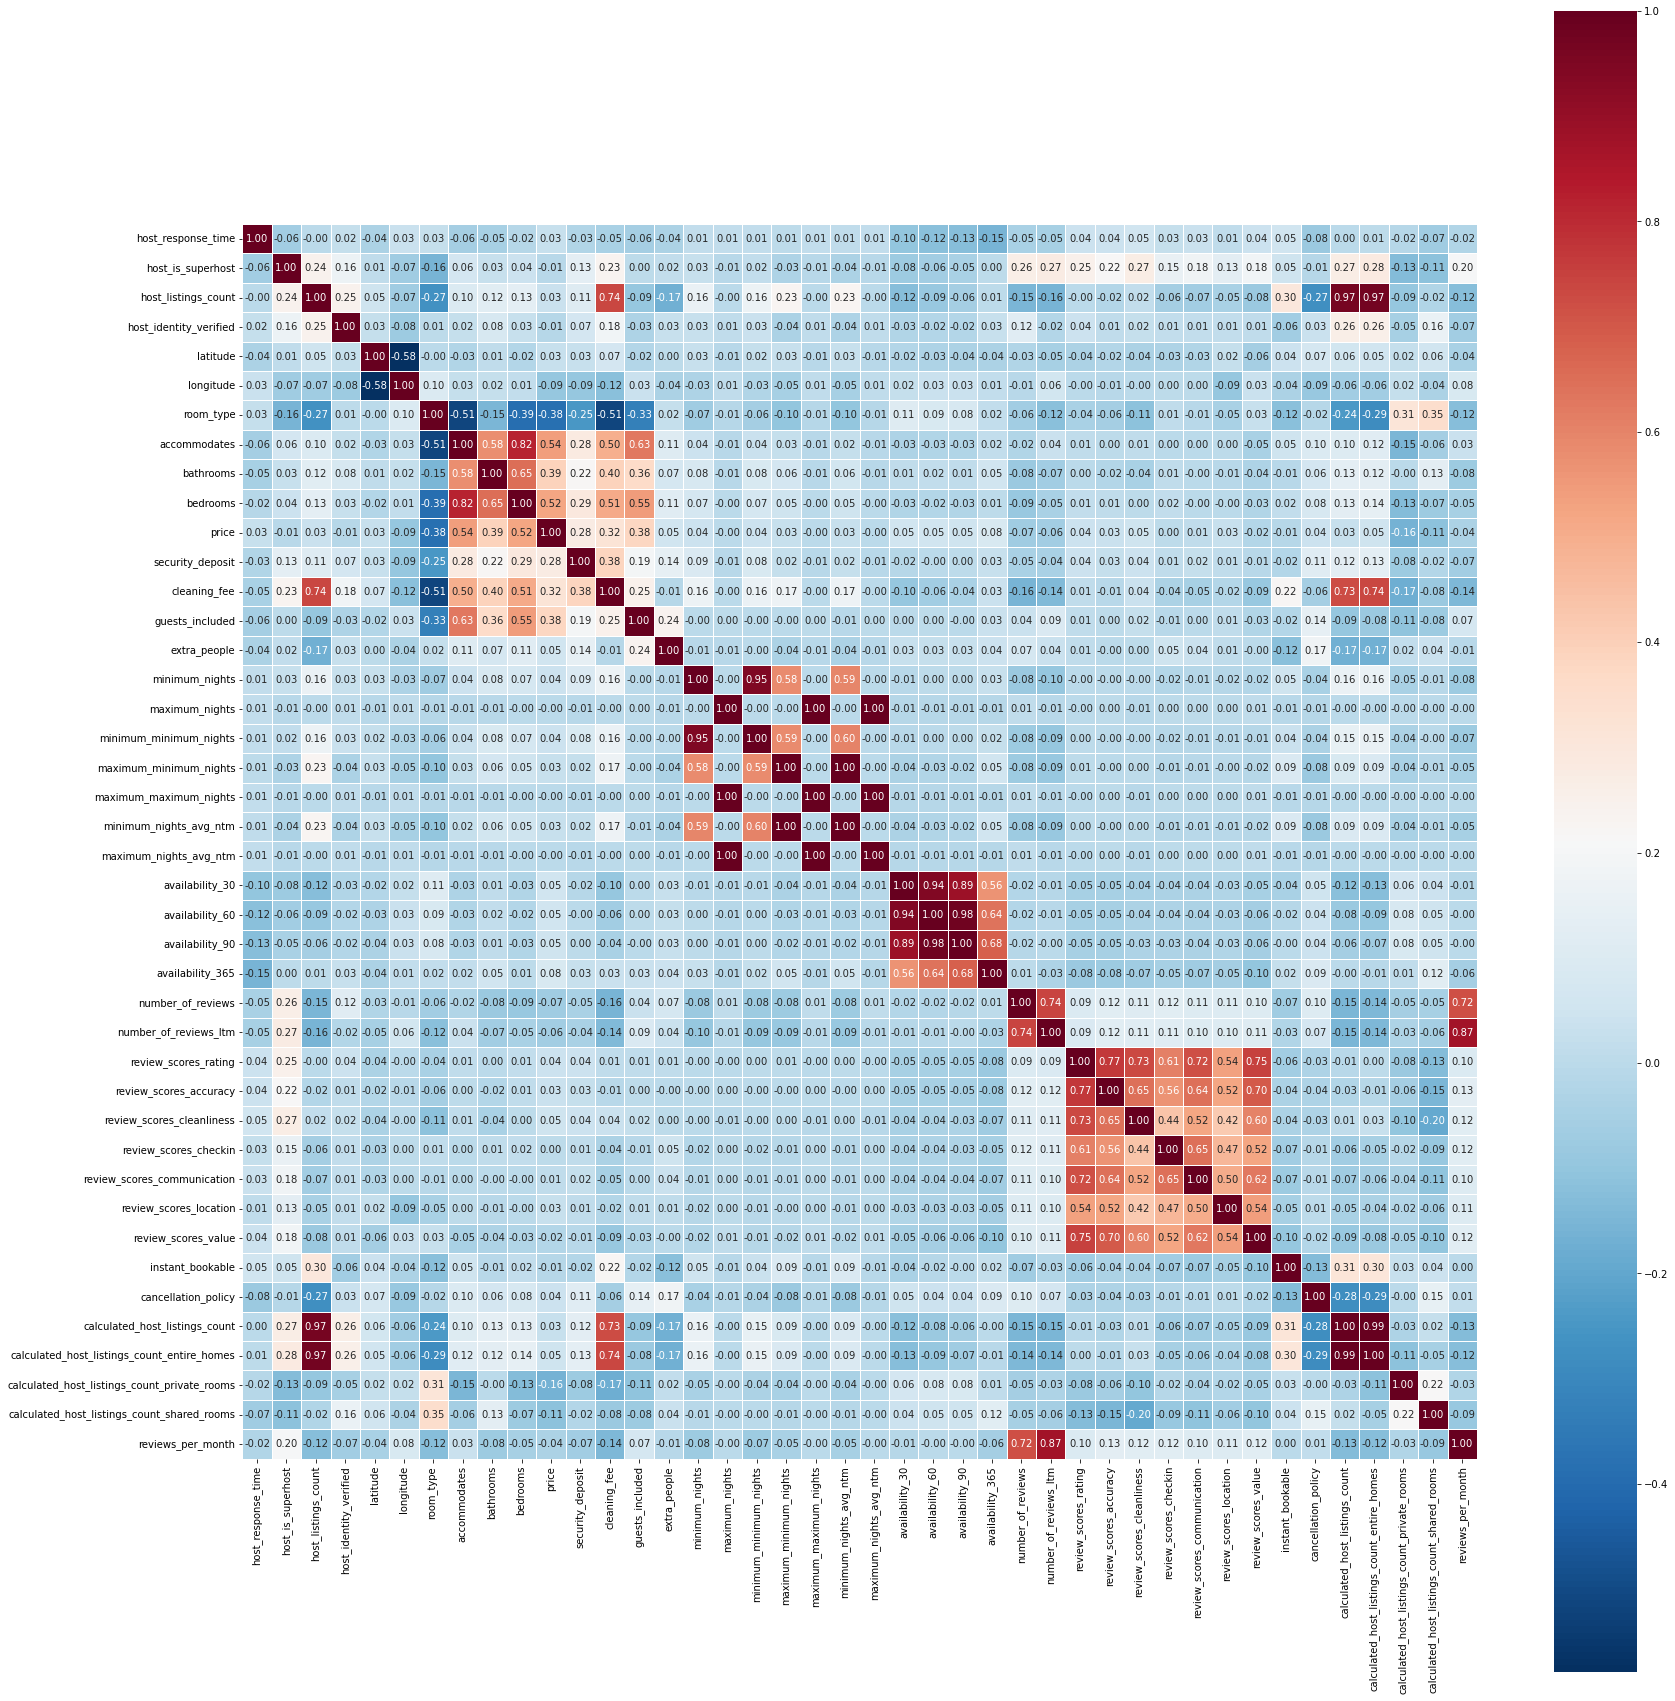

In [ ]:
_, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(df_corr,
            square=True,
            cmap='RdBu_r',
            linewidths=.5,
            annot=True,
            fmt='.2f',
            ax=ax).figure.tight_layout()

plt.show()


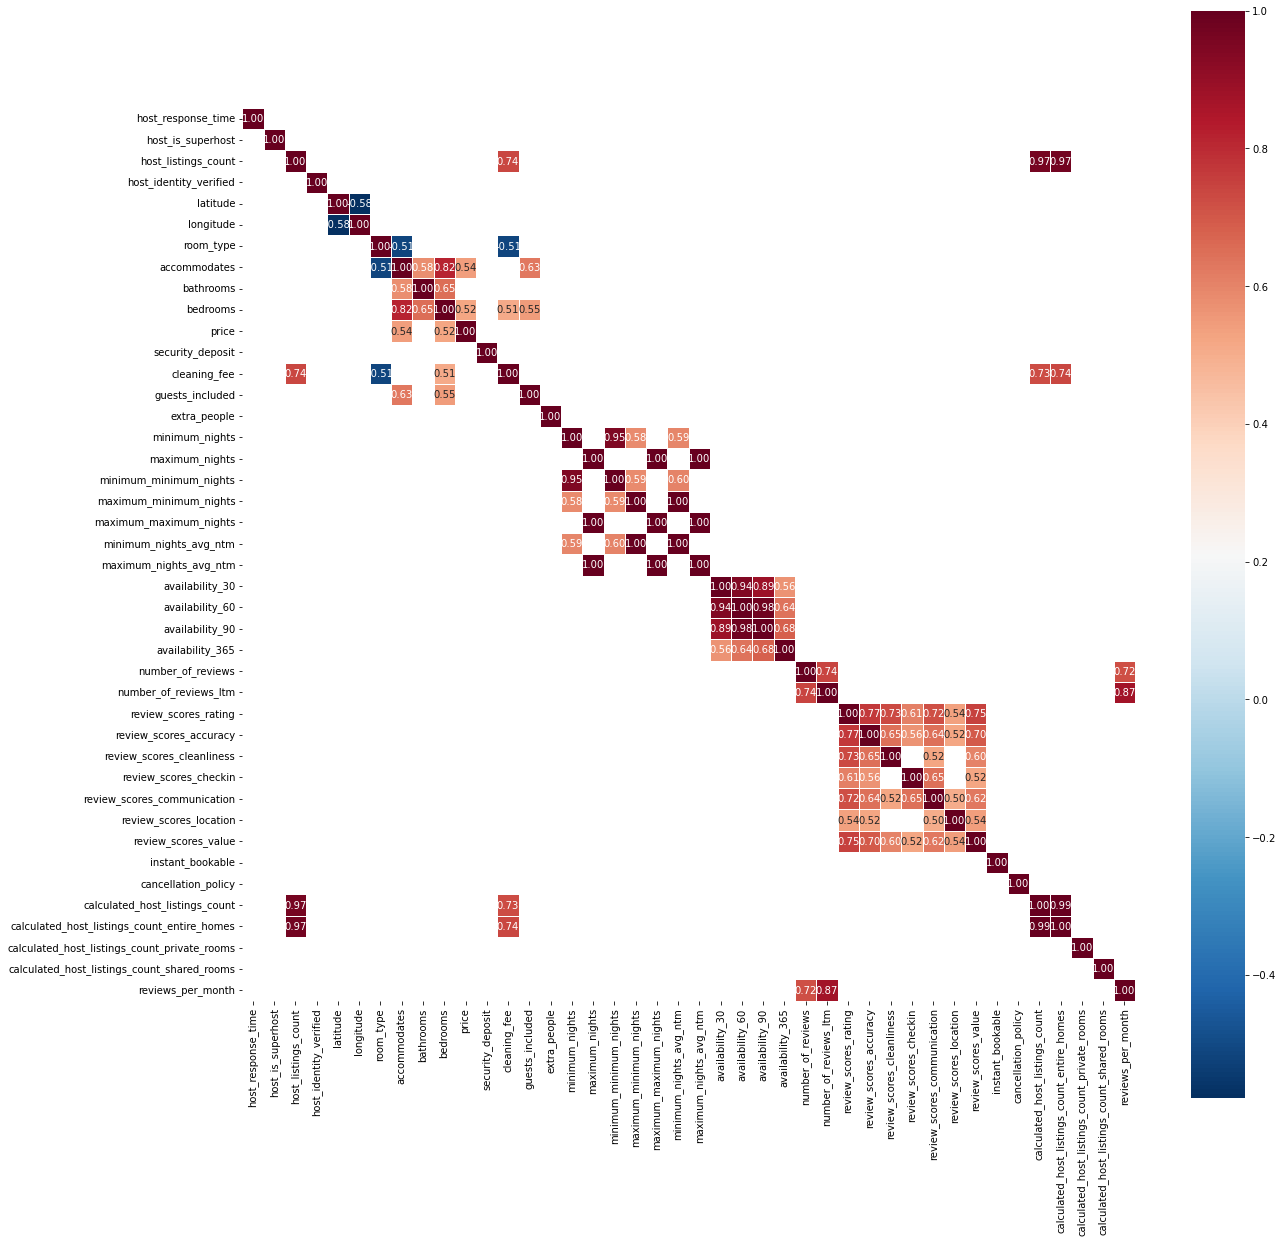

In [ ]:
# filter the correlation matrix with threshold

filtered_df = df_corr[((df_corr >= .5) | (df_corr <= -.5))
                      & (df_corr != 1)].dropna(how="all")

_, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(filtered_df,
            square=True,
            cmap='RdBu_r',
            linewidths=.5,
            annot=True,
            fmt='.2f',
            ax=ax)

plt.show()

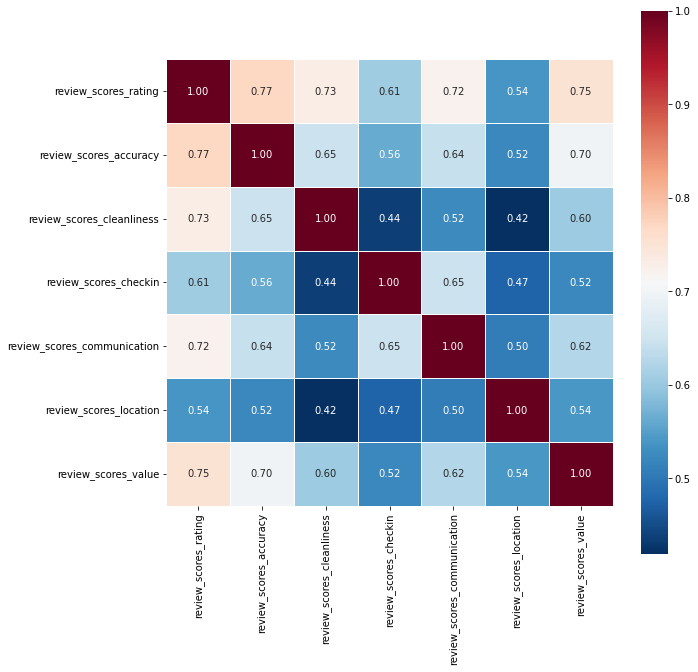

In [ ]:
reviews_list = [
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]
reviews_df = df_corr[reviews_list].loc[reviews_list]

_, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(reviews_df,
            square=True,
            cmap='RdBu_r',
            linewidths=.5,
            annot=True,
            fmt='.2f',
            ax=ax)

plt.show()

In [ ]:
# c = df_corr.abs()
s = df_corr.unstack()
so = s.sort_values(kind="quicksort").drop_duplicates()

In [ ]:
so_df = pd.DataFrame(so[so > 0.5])
so_df

,,0
review_scores_location,review_scores_communication,0.504891
cleaning_fee,bedrooms,0.507870
review_scores_value,review_scores_checkin,0.520694
review_scores_location,review_scores_accuracy,0.522832
review_scores_cleanliness,review_scores_communication,0.523436
price,bedrooms,0.524789
review_scores_rating,review_scores_location,0.537458
review_scores_value,review_scores_location,0.539188
price,accommodates,0.539879
bedrooms,guests_included,0.549397


In [ ]:
### LinearRegression for price with reviews

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
review_price = data[['price',
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value'
]]

In [ ]:
review_price.dropna(how='any',inplace=True)

/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_5045/1634140639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_price.dropna(how='any',inplace=True)


In [ ]:
review_price.isna().sum()

price                          0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [ ]:
X = review_price[reviews_list].values
y = review_price['price'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_train_lr = lr.predict(X_train)

print(np.sqrt(mean_squared_error(y_train, pred_train_lr)))

print(r2_score(y_train, pred_train_lr))

139.60866940530659
0.017851486947474293


In [ ]:
pred_test_lr = lr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, pred_test_lr)))

print(r2_score(y_test, pred_test_lr))

117.4746013779512
0.03188507135404195


In [ ]:
# not well

In [ ]:
from scipy.stats import zscore

In [ ]:
z_scores = zscore(numeric_features)
new_airbnb = abs(z_scores)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaled_features = scaler.fit_transform(new_airbnb)
scaled_features_airbnb = pd.DataFrame(scaled_features,
                                      index=new_airbnb.index,
                                      columns=new_airbnb.columns)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = scaled_features_airbnb.drop('price', axis=1)
y = scaled_features_airbnb['price']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [ ]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
model = regressor.fit(X_train, y_train)
y1 = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [ ]:
print('MSE', mean_squared_error(y_test, y1))
print('RMSE', math.sqrt(mean_squared_error(y_test, y1)))
print(
    'Adj R^2 value:', 1 - (1 - regressor.score(X_test, y_test)) *
    (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

MSE 15248.699375146116
RMSE 123.48562416389252
Adj R^2 value: -0.07617928050445477


In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
# fit the classifier to the training set
clf.fit(X_train, y_train.astype(int))

RandomForestClassifier(random_state=0)

In [ ]:
# predict on the test set
y_pred = clf.predict(X_test)

In [212]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_im_20 = feat_importances.nlargest(20).sort_values(ascending=True)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [213]:
feat_im_20

availability_90                                0.020267
number_of_reviews                              0.020274
minimum_nights                                 0.020306
maximum_nights                                 0.020815
maximum_minimum_nights                         0.021953
calculated_host_listings_count_entire_homes    0.022184
minimum_nights_avg_ntm                         0.022264
minimum_minimum_nights                         0.022742
host_listings_count                            0.022966
extra_people                                   0.023937
reviews_per_month                              0.025187
guests_included                                0.037673
security_deposit                               0.041912
availability_365                               0.047543
cleaning_fee                                   0.052869
bathrooms                                      0.056600
latitude                                       0.059324
bedrooms                                       0

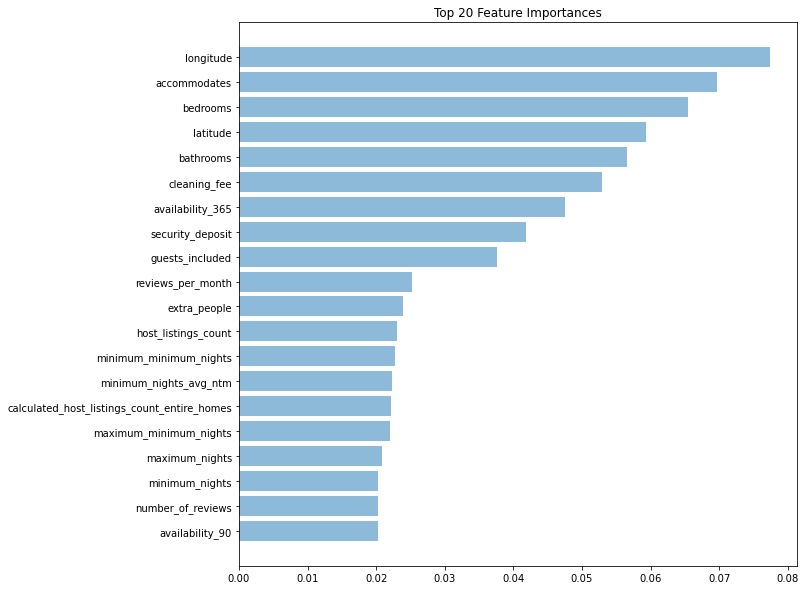

In [214]:
# visualize feature importance

_, ax = plt.subplots(figsize=(10, 10))

ax.barh(feat_im_20.index, feat_im_20.values,alpha=0.5,align='center')
ax.set(title='Top 20 Feature Importances')

plt.show()

In [215]:



from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from math import sqrt

### Ridge Regression

In [239]:
rr = Ridge(alpha=0.01)

rr.fit(X_train, y_train) 

pred_train_rr= rr.predict(X_train)

In [240]:
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))

print(r2_score(y_train, pred_train_rr))

139.60866940540765
0.01785148694605221


In [241]:
pred_test_rr= rr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 

print(r2_score(y_test, pred_test_rr))

117.47460427056062
0.03188502367772106


### Lasso Regression

In [242]:
model_lasso = Lasso(alpha=0.01)

model_lasso.fit(X_train, y_train) 

pred_train_lasso= model_lasso.predict(X_train)

In [243]:
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))

print(r2_score(y_train, pred_train_lasso))

139.60867944545825
0.017851345682316055


In [244]:
pred_test_lasso= model_lasso.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 

print(r2_score(y_test, pred_test_lasso))

117.47643380703185
0.03185486881215194


In [245]:
#Elastic Net

model_enet = ElasticNet(alpha = 0.01)

model_enet.fit(X_train, y_train) 

pred_train_enet= model_enet.predict(X_train)

In [246]:
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))

print(r2_score(y_train, pred_train_enet))

139.60925680536417
0.017843222198454467


In [247]:
pred_test_enet= model_enet.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))

print(r2_score(y_test, pred_test_enet))

117.48295384036436
0.03174740021625866


In [248]:

# nominal_features = data.select_dtypes(include=['object'])


## Modeling and prediction


# Part two-Fustion with reviews and neighbors


## Fusion with reviews


In [249]:
reviews = pd.read_csv('./data/reviews.csv')
print(reviews.shape)
reviews.head()

(212513, 2)


,listing_id,date
0,4952,2009-08-02
1,4952,2009-09-04
2,4952,2009-10-16
3,4952,2009-12-10
4,4952,2010-06-08


In [250]:
rev_row = reviews['listing_id'].unique()

In [251]:
data_rev = data.loc[data['id'].isin(rev_row)]
data_rev.head()

,id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within an hour,100%,98%,t,Palo Alto,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",$90.00,$0.00,$35.00,1,$45.00,2,365,2,2,365,365,2.0,365.0,2 months ago,0,0,0,0,2020-05-30,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,"{""PALO ALTO""}",f,moderate,f,f,5,0,5,0,0.57
1,11464,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,42458,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,90%,f,Santa Clara,13.0,13.0,"['email', 'phone', 'reviews']",t,f,"Santa Clara, CA, United States",Santa Clara,Santa Clara,Santa Clara,CA,95051,"South Bay, CA","Santa Clara, CA",37.34342,-121.98829,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$85.00,$700.00,$250.00,1,$10.00,14,365,14,14,365,365,14.0,365.0,5 months ago,30,60,90,179,2020-05-31,6,1,2014-06-15,2019-10-11,87.0,10.0,10.0,10.0,9.0,9.0,9.0,"{""SANTA CLARA""}",f,moderate,f,t,12,12,0,0,0.08
2,17884,2020-05-31,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...","This is a very quiet family neighborhood, but ...","I cannot accommodate cats, s

In [252]:
data_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5734 entries, 0 to 7214
Data columns (total 86 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5734 non-null   int64  
 1   last_scraped                                  5734 non-null   object 
 2   name                                          5734 non-null   object 
 3   summary                                       5563 non-null   object 
 4   space                                         4571 non-null   object 
 5   description                                   5606 non-null   object 
 6   neighborhood_overview                         3884 non-null   object 
 7   notes                                         3191 non-null   object 
 8   transit                                       3618 non-null   object 
 9   access                                        3642 non-null   o

In [253]:
data_rev.describe(include='all')

,id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.734000e+03,5734,5734,5563,4571,5606,3884,3191,3618,3642,3640,4196,5.734000e+03,5733,5733,5721,4050,4470,4470,5419,5733,4859,5733.000000,5733.000000,5734,5733,5733,5734,5365,5734,5733,5733,5690,5725,5734,5734.000000,5734.000000,5734,5734,5734,5734.000000,5734.000000,5729.000000,5707.000000,5734,5734,5734,4822,5337,5734.000000,5734,5734.000000,5.734000e+03,5734.000000,5734.000000,5.734000e+03,5.734000e+03,5734.000000,5.734000e+03,5734,5734.000000,5734.000000,5734.000000,5734.000000,5734,5734.000000,5734.000000,5707,5707,5651.000000,5649.000000,5649.000000,5648.000000,5649.000000,5648.000000,5648.000000,5006,5734,5734,5734,5734,5734.00000,5734.000000,5734.000000,5734.000000,5707.000000
unique,NaN,2,5615,4920,3791,5224,3066,2479,2834,3047,2780,3231,NaN,1812,1864,181,1791,4,41,74,2,114,NaN,NaN,222,2,2,32,36,16,30,4,73,4,32,NaN,NaN,2,27,4,NaN,NaN,NaN,NaN,5,5247,385,77,158,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN,NaN,NaN,2,NaN,NaN,1909,787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,4,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,2020-05-31,TRIBE ❤️ Deep Cleaned 2BR @ Great Mall Milpitas,The HackerHome Network New to the Valley? Tran...,"At Zeus, we focus exclusively on 30 day+ stays...","Dorm-style house in Silicon Valley. No-host, 5...",*Area Highlights* -Located in the Heart of the...,Parking is not included with your stay. Parkin...,This Flat Location is Uber/Lyft Accessible & C...,"• All utilities are included, including gas, e...",We're available 24/7 via Text | Email | Emerge...,By reserving your stay with Tribe you hereby a...,NaN,Zeus,2015-11-02,"San Jose, California, United States",Zeus is reinventing corporate housing. We do t...,within an hour,100%,100%,t,Santa Clara,NaN,NaN,"['email', 'phone', 'reviews', 'kba']",t,f,"San Jose, CA, United States",Palo Alto,San Jose,San Jose,CA,95112,"South Bay, CA","San Jose, CA",NaN,NaN,t,House,Private room,NaN,NaN,NaN,NaN,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Break...",$75.00,$0.00,$30.00,NaN,$0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 months ago,NaN,NaN,NaN,NaN,2020-05-31,NaN,NaN,2019-05-10,2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""SAN JOSE""}",f,moderate,f,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,3778,21,44,242,20,28,41,59,26,56,120,NaN,242,243,1648,242,3362,3717,1947,2875,581,NaN,NaN,401,5730,3120,2431,666,2320,2431,5730,311,4552,2431,NaN,NaN,5414,3046,2781,NaN,NaN,NaN,NaN,5676,19,162,1567,383,NaN,2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1007,NaN,NaN,NaN,NaN,3778,NaN,NaN,21,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2257,3262,2002,5532,5547,NaN,NaN,NaN,NaN,NaN
mean,2.461825e+07,NaN,NaN,NaN,N

In [254]:
counts = reviews['listing_id'].value_counts()


In [255]:
counts.head()

7476637     489
52786       478
10814836    445
19641513    429
13828514    427
Name: listing_id, dtype: int64

## Fusion with neighborhood data


In [256]:
neighbors = pd.read_csv('./data/neighbourhoods.csv')
print(neighbors.shape)
neighbors.head()

(16, 2)


,neighbourhood_group,neighbourhood
0,NaN,Campbell
1,NaN,Cupertino
2,NaN,Gilroy
3,NaN,Los Altos
4,NaN,Los Altos Hills


In [257]:
data_neighbor = data['neighbourhood'].unique().tolist()
neighbors_hood = neighbors['neighbourhood'].unique().tolist()

In [258]:
same_locations = []

for neighbor in neighbors_hood:
    if neighbor in data_neighbor:
        same_locations.append(neighbor)

In [259]:
same_locations

['Campbell',
 'Cupertino',
 'Los Altos',
 'Los Altos Hills',
 'Mountain View',
 'Palo Alto',
 'Santa Clara',
 'Sunnyvale']

In [260]:
data_neighbor

['Palo Alto',
 'Santa Clara',
 'Mountain View',
 'South San Jose',
 'Cupertino',
 'Sunnyvale',
 'Downtown',
 'Campbell',
 'West Valley',
 'Edenvale',
 nan,
 'Willow Glen',
 'Central San Jose',
 'Los Altos',
 'Berryessa',
 'Cory',
 'College Park',
 'Alum Rock',
 'Cambrian/Pioneer',
 'North San Jose',
 'Los Altos Hills',
 'Burbank/Del Monte',
 'Evergreen',
 'Newhall/Sherwood',
 'Shasta/Hanchett Park',
 'Rose Garden',
 'Five Wounds/Brookwood Terrace',
 'Naglee Park',
 'Forest/Pruneridge',
 'Alviso',
 'Japantown',
 'Stanford',
 'Delmas Park',
 'Chapman/Morse',
 'Menlo Park',
 'Autumn/Montgomery',
 'Vermont/McKendrie']

In [261]:
neighbors_hood

['Campbell',
 'Cupertino',
 'Gilroy',
 'Los Altos',
 'Los Altos Hills',
 'Los Gatos',
 'Milpitas',
 'Monte Sereno',
 'Morgan Hill',
 'Mountain View',
 'Palo Alto',
 'San Jose',
 'Santa Clara',
 'Saratoga',
 'Sunnyvale',
 'Unincorporated Areas']

## ideas list

### methdology for this large scale data?

### which cols we need

### What to compare

- Room Type vs Price
- Price/log price Distribution Plot
- clean fee

### pipleline?

## Codes for refering

- [amenities refer](https://www.kaggle.com/brittabettendorf/predicting-prices-xgboost-feature-engineering)
- [word cloud /weighted words /sentimental analsys / topic modeling](https://www.kaggle.com/brittabettendorf/nlp-on-airbnb-data)

### nextweek

modeling for price prediction
